In [3]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector
%matplotlib inline

In [122]:
encoded_numberer = '11010'

In [136]:
def detector(circuit, number):
    for idx in range(len(number)):
        if number[idx] == '0':
            circuit.x(idx)

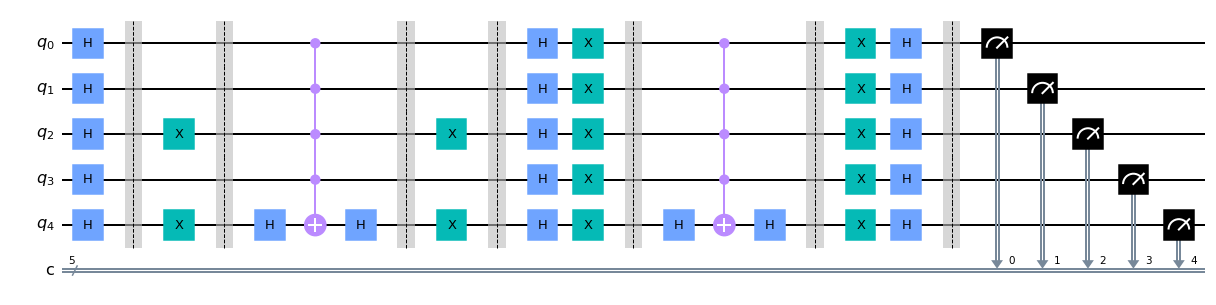

In [137]:
n_qubits = len(encoded_numberer)

qc = QuantumCircuit(n_qubits,n_qubits)

qc.h(range(n_qubits))
qc.barrier()

# start oracle
detector(qc, encoded_numberer)

qc.barrier()
qc.h(n_qubits - 1)
qc.mct(list(range(n_qubits - 1)), n_qubits - 1)
qc.h(n_qubits - 1)
qc.barrier()

detector(qc, encoded_numberer)
# end oracle

# diffusion amplification
qc.barrier()
qc.h(range(n_qubits))
qc.x(range(n_qubits))

qc.barrier()
qc.h(n_qubits - 1)
qc.mct(list(range(n_qubits - 1)), n_qubits - 1)
qc.h(n_qubits - 1)

qc.barrier()

qc.x(range(n_qubits))
qc.h(range(n_qubits))
# end diffusion amplification

qc.barrier()

qc.measure(range(n_qubits), range(n_qubits))
qc.draw(output='mpl')

In [138]:
# simulators
statevec_sim = qiskit.Aer.get_backend("statevector_simulator")
qasm_sim = qiskit.Aer.get_backend("qasm_simulator")

In [139]:
sim_state_vector = qiskit.execute(qc, backend=statevec_sim).result().get_statevector()
sim_counts = qiskit.execute(qc, backend=qasm_sim, shots=1024).result().get_counts()

{'00000': 22, '00001': 25, '10000': 26, '10001': 20, '10010': 25, '10011': 21, '10100': 22, '10101': 16, '10110': 24, '10111': 17, '11000': 30, '11001': 27, '11010': 20, '11011': 33, '11100': 25, '11101': 28, '11110': 25, '11111': 18, '00010': 38, '00011': 32, '00100': 19, '00101': 25, '00110': 16, '00111': 32, '01000': 25, '01001': 21, '01010': 27, '01011': 289, '01100': 21, '01101': 17, '01110': 21, '01111': 17}


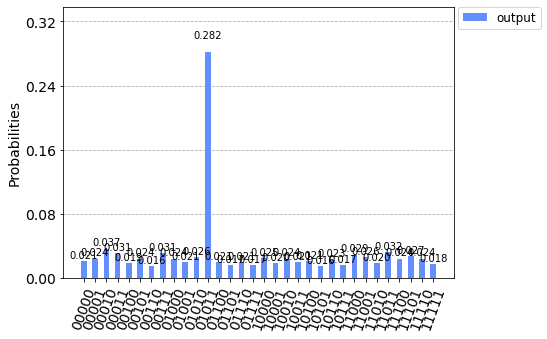

In [140]:
print(sim_counts)
plot_histogram([sim_counts], legend=['output'])

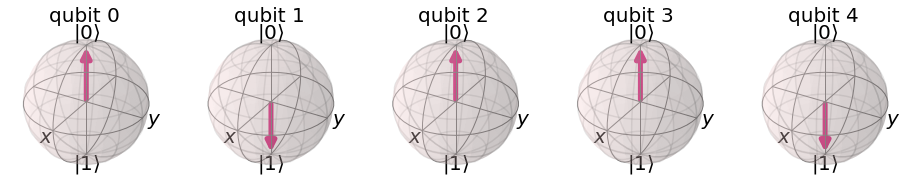

In [141]:
plot_bloch_multivector(sim_state_vector)

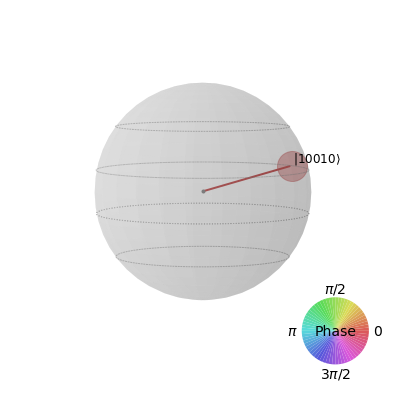

In [142]:
plot_state_qsphere(sim_state_vector)